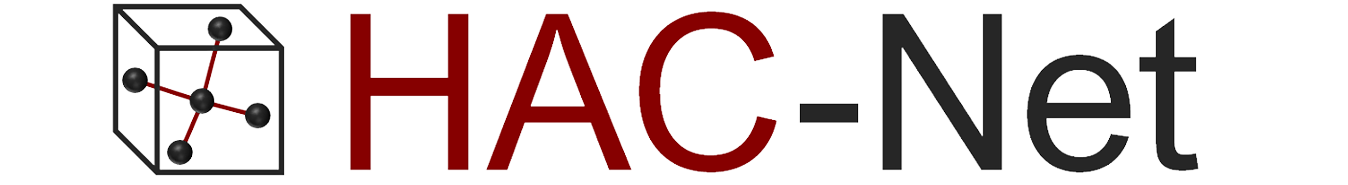

**This Colab notebook allows you to easily and quickly predict the binding affinity between a protein and ligand using [HACNet v1.4.2](https://github.com/gregory-kyro/HAC-Net). For more details, check out the associated [journal article](https://pubs.acs.org/doi/10.1021/acs.jcim.3c00251) or [open-access article](https://arxiv.org/abs/2212.12440). Additionally, the software is available as open-source on [GitHub](https://github.com/gregory-kyro/HAC-Net).**

**For a complete tutorial on how to use this notebook to predict $pK_{D}$, please navigate to this [demo video](https://www.linkedin.com/feed/update/urn:li:activity:7059553793595555840/).**

**For details regarding the implementation in this notebook, please see [this document](https://github.com/gregory-kyro/HAC-Net/blob/main/HACNet/predict_pkd_info.txt).**

**Feel free to reach out via email with any questions or concerns:**

**gregory.kyro@yale.edu** &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; **rafi.brent@yale.edu**

**In order to properly run this notebook:**

**Step 1 - select "Tools" at the top of the notebook" -> select "Command palette" -> select "Use fallback runtime"**

**Step 2 - run the first cell to begin setting up the environment of the notebook (this will crash the runtime)**

**Step 3 - after the notebook has crashed, run the first cell again to finish setting up the notebook environment**

**Step 4 - upload protein (pdb) and ligand (mol2) files to the notebook, as shown in the demo video**

**Step 5 - type the names of the uploaded files into the second cell, select the type of output you would like to receive, and run the second cell**

In [ ]:
#@title Set Up Environment { display-mode: "form" }

#@markdown **Please execute this cell by pressing the *Play* button on the left
#@markdown to set up the environment of the notebook to run HACNet. This will
#@markdown initially crash the notebook to reconfigure the environment --
#@markdown please then press *Play* again.**

# hide outputs
%%capture

# install condacolab
!pip install -q condacolab

# import condacolab
import condacolab

# install condacolab environment
condacolab.install()

# import condacolab
import condacolab

# check that the environment has been initialized properly
condacolab.check()

# install openbabel
!conda install -c conda-forge openbabel

# install pymol
!mamba install -c schrodinger pymol-bundle

# install biopandas
!pip install biopandas

# import torch
import torch

# install necessary torch packages
!pip install torch-geometric torch-scatter torch-sparse \
 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

# install HACNet
!pip install HACNet

 # import predict_pkd function from HACNet package
from HACNet.functions import predict_pkd

# clone GitHub repository containing parameter files for HAC-Net
!git clone https://github.com/gregory-kyro/HAC-Net.git

# define xml file containing atomic features
elements_xml = '/content/HAC-Net/HACNet/element_features.xml'

# define 3D-CNN parameter file
cnn_params = '/content/HAC-Net/HACNet/parameter_files/CNN_parameters.pt'

# define GCN parameter file
gcn0_params = '/content/HAC-Net/HACNet/parameter_files/GCN0_parameters.pt'

# define other GCN parameter file
gcn1_params = '/content/HAC-Net/HACNet/parameter_files/GCN1_parameters.pt'

# define MLP parameter file
mlp_params = '/content/HAC-Net/HACNet/parameter_files/MLP_parameters.pt'

In [ ]:
#@title Predict Binding Affinity (pKd)
#@markdown **Enter the paths to the protein and ligand structural files, select
#@markdown the type of output you wish to receive, and then press the *Play*
#@markdown button on the left.**

protein = ''  #@param {type:'string'}
ligand = ''  #@param {type:'string'}
output = "pKd and visual" #@param ["pKd and visual", "only pKd"] {allow-input: true}

if output == "pKd and visual":
  verbose = True
elif output == 'only pKd':
  verbose = False

predict_pkd(protein_pdb=protein, ligand_mol2=ligand, elements_xml=elements_xml,
            cnn_params=cnn_params, gcn0_params=gcn0_params, gcn1_params=gcn1_params,
            mlp_params=mlp_params, verbose=verbose)